In [1]:
#import 

import numpy as np

import pandas as pd 

# Load shark attack 
url = 'https://raw.githubusercontent.com/iSundhararajan/Shark_Attacks/main/GSAF5.csv'
shark_attack = pd.read_csv(url)

In [2]:
shark_attack

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
shark_attack.nunique()

Date              5973
Year               259
Type                12
Country            225
State              902
Location          4514
Activity          1587
Name              5683
Sex                  8
Age                169
Injury            4079
Unnamed: 11         12
Time               410
Species           1675
Source            5302
pdf               6789
href formula      6785
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64

after analyzing the contents of the columns, we identified 2 columns full of null values 
we couldeliminate immediately


We also decided that only the first 12 rows had the most relevant data. So we dropped the ones
we knew would not be relevant

In [4]:
# cut all rows that are totally null
shark_attack=shark_attack.dropna(how='all')

In [5]:
shark_attack.Sex.unique() # we need to standardize the gender categories

#this is the code we used to correct and standardize sex column

corrections = {' M': 'M', 'M ':'M', 'M x 2':'M'}
shark_attack['Sex'] = shark_attack['Sex'].replace(corrections)

corrections = {'lli':'na', 'N':'na', '.':'na'}
shark_attack['Sex'] = shark_attack['Sex'].replace(corrections)

# we need to decide what to do with 'lli', 'N', '.' (we will treat these as null)

In [6]:
shark_attack['Sex'].value_counts()

Sex
M     5582
F      779
na       4
Name: count, dtype: int64

In [7]:
shark_attack.Type.unique() # we need to standardize the Type categories

corrections = {' Provoked':'Provoked'}
shark_attack['Type'] = shark_attack['Type'].replace(corrections)

'?', 'Unconfirmed', 'Unverified', 'Invalid'

corrections = {'?':'Unconfirmed', 'Unverified':'Unconfirmed', 
               'Invalid':'Unconfirmed', 'Under investigation':'Unconfirmed', 
               'Questionable':'Unconfirmed','Boat':'Watercraft'}
shark_attack['Type'] = shark_attack['Type'].replace(corrections)

shark_attack.Type.unique()

shark_attack.Type.value_counts()

Type
Unprovoked      5107
Provoked         637
Unconfirmed      578
Watercraft       362
Sea Disaster     242
Name: count, dtype: int64

In [8]:
shark_attack['Country']=shark_attack['Country'].str.upper()

In [9]:

# Coast of AFRICA, EGYPT / ISRAEL, IRAN / IRAQ, ITALY / CROATIA,RED SEA / INDIAN OCEAN,SOLOMON ISLANDS / VANUATU'

"""
We have corrected the countries that were misspelled on our first review of the country list.
"""

corrections = {'Mexico':'MEXICO',' PHILIPPINES':'PHILIPPINES',' TONGA':'TONGA','CEYLON':'CEYLON (SRI LANKA)'
                ,'COLUMBIA':'COLOMBIA','EGYPT ':'EGYPT','Fiji':'FIJI','INDIAN OCEAN?':'INDIAN OCEAN',
               'MALDIVE ISLANDS':'MALDIVES','MEXICO ':'MEXICO','Maldives':'MALDIVES','MeXICO':'MEXICO',
               'NICARAGUA ':'NICARAGUA','NORTH ATLANTIC OCEAN ':'NORTH ATLANTIC OCEAN', 'New Zealand':'NEW ZEALAND',
               'OKINAWA':'JAPAN','PACIFIC OCEAN ':'PACIFIC OCEAN', 'RED SEA?':'RED SEA','REUNION':'REUNION ISLAND',
               'SAN DOMINGO':'SANTO DOMINGO','ST HELENA, British overseas territory':'ST HELENA','ST. MAARTIN':'ST MARTIN',
               'ST. MARTIN':'ST MARTIN','SUDAN?':'SUDAN','UNITED ARAB EMIRATES (UAE)':'UNITED ARAB EMIRATES','ENGLAND':'UNITED KINGDOM','SCOTLAND':'UNITED KINGDOM',
               'ST KITTS / NEVIS':'ST KITTS AND NEVIS','RED SEA / INDIAN OCEAN':'RED SEA','ANDAMAN / NICOBAR ISLANDAS':'ANDAMAN',
               'IRAN / IRAQ':'IRAN','SOUTHWEST PACIFIC OCEAN':'SOUTH PACIFIC OCEAN','ITALY / CROATIA':'ITALIA', 'YEMEN ':'YEMEN',
               'CEYLON (SRI LANKA)':'SRI LANKA','ASIA?':'ASIA',
              }

shark_attack['Country']=shark_attack['Country'].replace(corrections)

In [10]:
shark_attack['Country'].nunique()

193

In [11]:
# we standardized the Date and State columns

shark_attack['Date']
shark_attack.isnull().sum()


Date                25
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age               3019
Injury              60
Unnamed: 11        587
Time              3551
Species           3157
Source              44
pdf                170
href formula       150
href               173
Case Number        171
Case Number.1      172
original order     170
Unnamed: 21       6968
Unnamed: 22       6967
dtype: int64

In [12]:
shark_attack['Date'] = shark_attack['Date'].astype(str).str.replace('-', ' ')

In [13]:
formats = [
    "%d %b%Y",    # Example: 14Jun2023
    "%d %b %Y",   # Example: 14 Jun 2023
    "%Y%m%d",     # Example: 20230614
    "%d %B %Y",   # Example: 14 June 2023
    "%d %b%Y",    # Example: 14Jun'23
    "%d %b %Y",   # Example: 14 Jun '23
    "%d%b%Y",     # Example: 14Jun'23
    "%d%b %Y",    # Example: 14Jun '23
    "%d %b%y",    # Example: 14Jun23
    "%d %b %y",   # Example: 14 Jun 23
    "%d%b%y",     # Example: 14Jun23
    "%d%b %y",    # Example: 14Jun 23
]

for fmt in formats:
    try:
        shark_attack['Date'] = pd.to_datetime(shark_attack['Date'], format=fmt)
        break  # Stop trying once successful
    except ValueError:
        continue  # Try the next format if ValueError is raised

shark_attack['Date'] = pd.to_datetime(shark_attack['Date'], errors='coerce')
shark_attack['Date'][500:550] 

500   2019-06-02
501   2019-05-29
502   2019-05-25
503   2019-05-25
504   2019-05-20
505   2019-05-17
506   2019-05-14
507   2019-05-14
508   2018-05-09
509   2019-05-08
510   2019-05-07
511   2019-05-04
512   2019-05-01
513          NaT
514   2019-04-23
515   2019-04-21
516   2019-04-12
517   2019-04-06
518   2019-04-06
519   2019-04-05
520   2019-03-26
521   2019-03-25
522   2019-03-22
523   2019-03-21
524   2019-03-16
525   2019-03-12
526   2019-03-05
527   2019-03-05
528   2018-02-18
529   2019-02-17
530   2019-02-14
531   2019-02-10
532   2019-02-04
533   2019-02-04
534   2019-02-02
535   2019-02-02
536   2019-01-30
537   2019-01-29
538   2019-01-14
539   2019-01-10
540   2019-01-08
541   2018-12-18
542   2018-12-15
543   2018-12-15
544   2018-12-09
545   2018-12-09
546   2018-11-28
547   2018-11-24
548   2018-11-18
549   2018-11-17
Name: Date, dtype: datetime64[ns]

In [14]:
shark_attack['State']=shark_attack['State'].str.upper()
shark_attack['State'].unique()

array(['QUEENSLAND', 'HAWAII', 'WESTERN AUSTRALIA', 'MAHARASHTRA', nan,
       'NEW  SOUTH WALES', 'PARADISE ISLAND', 'SOUTH AUSTRALIA',
       'EASTERN CAPE PROVINCE', 'SONORA', 'NEW SOUTH WALES',
       'SOUTH ISLAND', 'GUERRERO', 'NEW PROVIDENCE   ISOAD', 'JALISCO',
       'GRAND  BAHAMA ISLAND', 'FLORIDA', 'WESTERM AUSTRALIA',
       'NORTH ISLAND', 'SOUTHERN RED SEA', 'QUINTANA ROO',
       'BELIZE DISTRICT', 'CALIFORNIA', 'SOUTH CAROLINA', 'SOUTH SINAI',
       'BOLINAO', 'NORTH CAROLINA', 'VALENCIA', 'NORTE', "SAVAI'I ISLAND",
       'NEW YORK', 'SAN ANDRÉS ISLAND', 'GALAPAGOS ISLANDS',
       'RED SEA PROTECTORATE', 'FREEPORT', 'TAHITI', 'POUM',
       'PROVIDENCIALES ISLAND', 'LUCAYAN LUCAYAN ARCHIPELAGO',
       'NEW JERSEY', 'MAYABEQUE', 'EASTEN CAPE PROVINCE', 'ARTEMISA',
       'PERNAMBUCO', 'PRASLIN ISLAND', 'SOUTH PROVINCE', 'PATAGONIA',
       'TAVEUNI ISLAND', 'GULF OF CALIFORNIA', 'VAAVU ATOLL', 'KNZ',
       'NEW SOUTH ALES', 'SAMOA', 'TEXAS', 'LOUISIANA', 'MISSISSIP

In [15]:
# corrected States

corrections = {"QUEENSLAND": "QUEENSLAND",
  "HAWAII": "HAWAII",
  "MAHARASHTRA": "MAHARASHTRA",
  "NEW SOUTH WALES": "NEW SOUTH WALES",
  "WESTERN AUSTRALIA": "WESTERN AUSTRALIA",
  "NORTH CAROLINA": "NORTH CAROLINA",
  "GRAND BAHAMA ISLAND": "GRAND BAHAMA ISLAND",
  "FLORIDA": "FLORIDA",
  "EASTERN CAPE PROVINCE": "EASTERN CAPE PROVINCE",
  "TEXAS": "TEXAS",
  "SOUTH CAROLINA": "SOUTH CAROLINA",
  "VAAVU ATOLL": "VAAVU ATOLL",
  "SÃO PAULO": "SÃO PAULO",
  "MAYABEQUE": "MAYABEQUE",
  "ALABAMA": "ALABAMA",
  "WESTMORELAND PARISH": "WESTMORELAND PARISH",
  "CALIFORNIA": "CALIFORNIA",
  "PHANG NGA PROVINCE": "PHANG NGA PROVINCE",
  "NORTE": "NORTE",
  "WESTERN CAPE PROVINCE": "WESTERN CAPE PROVINCE",
  "MISSISSIPPI": "MISSISSIPPI",
  "SOLOMON ISLAND": "SOLOMON ISLAND",
  "EASTERN SAMAR": "EASTERN SAMAR",
  "LEYTE": "LEYTE",
  "TAHITI": "TAHITI",
  "TOKYO PREFECTURE": "TOKYO PREFECTURE",
  "NORTHERN TERRITORY": "NORTHERN TERRITORY",
  "NORTHERN IRELAND": "NORTHERN IRELAND",
  "NORTH RHINE-WESTPHALIA": "NORTH RHINE-WESTPHALIA",
  "NEWFOUNDLAND AND LABRADOR": "NEWFOUNDLAND AND LABRADOR",
  "EAST JAVA": "EAST JAVA",
  "GUANGXI": "GUANGXI",
  "SAN LUIS POTOSÍ": "SAN LUIS POTOSÍ",
  "CHIAPAS": "CHIAPAS",
  "GUANAJUATO": "GUANAJUATO",
  "VERACRUZ": "VERACRUZ",
  "YUCATÁN": "YUCATÁN",
  "SINALOA": "SINALOA",
  "AGUASCALIENTES": "AGUASCALIENTES",
  "COAHUILA": "COAHUILA",
  "TABASCO": "TABASCO",
  "HIDALGO": "HIDALGO",
  "QUERÉTARO": "QUERÉTARO",
  "NAYARIT": "NAYARIT",
  "QUINTANA ROO": "QUINTANA ROO",
  "CAMPECHE": "CAMPECHE",
  "ZACATECAS": "ZACATECAS",
  "MEXICO CITY": "MEXICO CITY",
  "MÉXICO STATE": "MÉXICO STATE",
  "DURANGO": "DURANGO",
  "BAJA CALIFORNIA SUR": "BAJA CALIFORNIA SUR",
  "TLAXCALA": "TLAXCALA",
  "COLIMA": "COLIMA",
  "MICHOACÁN": "MICHOACÁN",
  "GUERRERO": "GUERRERO",
  "PUEBLA": "PUEBLA",
  "MORELOS": "MORELOS",
  "CENTRAL JAVA": "CENTRAL JAVA",
  }

shark_attack['State']=shark_attack['State'].replace(corrections)

In [16]:
shark_attack.isnull().sum()

Date              1592
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age               3019
Injury              60
Unnamed: 11        587
Time              3551
Species           3157
Source              44
pdf                170
href formula       150
href               173
Case Number        171
Case Number.1      172
original order     170
Unnamed: 21       6968
Unnamed: 22       6967
dtype: int64

In [17]:
shark_attack.rename(columns= {'Species ': 'Species'}, inplace=True)
shark_attack.columns

shark_attack['Species'].value_counts()

Species
White shark                                                                                                                      194
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   92
Tiger shark                                                                                                                       89
                                                                                                                                ... 
1.2 m to 1.8 m [4' to 6'] shark                                                                                                    1
Grey nurse shark, 3 m female                                 

In [18]:
#age column was converted to float

shark_attack['Age'] = pd.to_numeric(shark_attack['Age'], errors='coerce')
shark_attack['Age'].mean()

# null values in age were assigned based on the mean of ages by gender

shark_attack.groupby('Sex')['Age'].mean()

shark_attack['Age']=shark_attack.loc[shark_attack['Age'].isnull(), 'Age'] = "28"

In [19]:
shark_attack.isnull().sum()

Date              1592
Year                27
Type                43
Country             75
State              507
Location           590
Activity           611
Name               245
Sex                604
Age                  0
Injury              60
Unnamed: 11        587
Time              3551
Species           3157
Source              44
pdf                170
href formula       150
href               173
Case Number        171
Case Number.1      172
original order     170
Unnamed: 21       6968
Unnamed: 22       6967
dtype: int64

In [20]:
shark_attack['Sex'].value_counts()

# Number of NaNs in the 'Sex' column
nans_to_fill = shark_attack['Sex'].isna().sum()

# Calculate how many should be 'M' (Male) and 'F' (Female)
n_males = int(0.88 * nans_to_fill)
n_females = nans_to_fill - n_males

values_to_fill = ['M'] * n_males + ['F'] * n_females

# Shuffle the list to randomize the distribution
np.random.shuffle(values_to_fill)

# Fill NaN values in the 'Sex' column
shark_attack.loc[shark_attack['Sex'].isna(), 'Sex'] = values_to_fill

shark_attack['Sex'].value_counts()

Sex
M     6113
F      852
na       4
Name: count, dtype: int64

In [21]:
pivot_attack = shark_attack.pivot_table(index='Date', columns='Country', values=['State'], aggfunc='sum')
pivot_attack

State                                         \
Country    ADMIRALTY ISLANDS AMERICAN SAMOA ANDAMAN ARGENTINA ARUBA   
Date                                                                  
1703-03-26               NaN            NaN     NaN       NaN   NaN   
1751-07-27               NaN            NaN     NaN       NaN   NaN   
1780-08-08               NaN            NaN     NaN       NaN   NaN   
1783-03-02               NaN            NaN     NaN       NaN   NaN   
1784-12-12               NaN            NaN     NaN       NaN   NaN   
...                      ...            ...     ...       ...   ...   
2024-02-14               NaN            NaN     NaN       NaN   NaN   
2024-02-25               NaN            NaN     NaN       NaN   NaN   
2024-03-02               NaN            NaN     NaN       NaN   NaN   
2024-03-04               NaN            NaN     NaN       NaN   NaN   
2024-03-15               NaN            NaN     NaN       NaN   NaN   

                                                                              \
Country    ATLANTIC OCEAN          AUSTRALIA AZORES BAHAMAS         BARBADOS   
Date                                                                           
1703-03-26            NaN                NaN    NaN     NaN  SOUTHWEST COAST   
1751-07-27            NaN                NaN    NaN     NaN              NaN   
1780-08-08            NaN                NaN    NaN     NaN              NaN   
1783-03-02            NaN                NaN    NaN     NaN              NaN   
1784-12-12            NaN                NaN    NaN     NaN              NaN   
...                   ...                ...    ...     ...              ...   
2024-02-14            NaN                NaN    NaN     NaN              NaN   
2024-02-25            NaN  WESTERN AUSTRALIA    NaN     NaN              NaN   
2024-03-02            NaN                NaN    NaN     NaN              NaN   
2024-03-04            NaN                NaN    NaN     NaN              NaN   
2024-03-15            NaN         QUEENSLAND    NaN     NaN              NaN   

            ...                                                               \
Country     ... TURKS AND CAICOS UNITED ARAB EMIRATES UNITED KINGDOM URUGUAY   
Date        ...                                                                
1703-03-26  ...              NaN                  NaN            NaN     NaN   
1751-07-27  ...              NaN                  NaN            NaN     NaN   
1780-08-08  ...              NaN                  NaN            NaN     NaN   
1783-03-02  ...              NaN                  NaN            NaN     NaN   
1784-12-12  ...              NaN                  NaN            NaN     NaN   
...         ...              ...                  ...            ...     ...   
2024-02-14  ...              NaN                  NaN            NaN     NaN   
2024-02-25  ...              NaN                  NaN            NaN     NaN   
2024-03-02  ...              NaN                  NaN            NaN     NaN   
2024-03-04  ...              NaN                  NaN            NaN     NaN   
2024-03-15  ...              NaN                  NaN            NaN     NaN   

                                                                         
Country               USA VANUATU VENEZUELA VIETNAM WESTERN SAMOA YEMEN  
Date                                                                     
1703-03-26            NaN     NaN       NaN     NaN           NaN   NaN  
1751-07-27  MASSACHUSETTS     NaN       NaN     NaN           NaN   NaN  
1780-08-08        FLORIDA     NaN       NaN     NaN           NaN   NaN  
1783-03-02            NaN     NaN       NaN     NaN           NaN   NaN  
1784-12-12            NaN     NaN       NaN     NaN           NaN   NaN  
...                   ...     ...       ...     ...           ...   ...  
2024-02-14            NaN     NaN       NaN     NaN           NaN   NaN  
2024-02-25            NaN     NaN       NaN   

In [22]:
shark_attack=shark_attack.drop('Unnamed: 21', axis=1)
shark_attack=shark_attack.drop('Unnamed: 22', axis=1)
shark_attack=shark_attack.drop('Time', axis=1)
shark_attack=shark_attack.drop('Species', axis=1)
shark_attack=shark_attack.drop('Case Number.1', axis=1)
shark_attack=shark_attack.drop('original order', axis=1)
shark_attack=shark_attack.drop('pdf', axis=1)
shark_attack=shark_attack.drop('href', axis=1)
shark_attack=shark_attack.drop('href formula', axis=1)
shark_attack=shark_attack.drop('Case Number', axis=1)
shark_attack=shark_attack.drop('Unnamed: 11', axis=1)
shark_attack=shark_attack.drop('Source', axis=1)
shark_attack=shark_attack.drop('Year', axis=1)
shark_attack=shark_attack.drop('Injury', axis=1)
shark_attack=shark_attack.drop('Name', axis=1)
shark_attack=shark_attack.drop('Activity', axis=1)

shark_attack=shark_attack.dropna(thresh=6)


In [23]:
shark_attack.isnull().sum()

Date        1141
Type          13
Country        2
State        128
Location     150
Sex            0
Age            0
dtype: int64

In [24]:
shark_attack['Sex']

0       F
1       M
2       F
3       F
4       M
       ..
6934    F
6938    M
6939    M
6941    M
6943    M
Name: Sex, Length: 6422, dtype: object

In [25]:
#map countries to regions so we can look at attacks by regions
region_mapping = {
    'AUSTRALIA': 'Oceania',
    'USA': 'North America',
    'INDIA': 'Southern Asia',
    'TRINIDAD': 'Caribbean',
    'BAHAMAS': 'Caribbean',
    'SOUTH AFRICA': 'Southern Africa',
    'MEXICO': 'North America',
    'NEW ZEALAND': 'Oceania',
    'EGYPT': 'Northern Africa',
    'BELIZE': 'Central America',
    'PHILIPPINES': 'Southeastern Asia',
    'CORAL SEA': 'Oceania',
    'SPAIN': 'Southern Europe',
    'PORTUGAL': 'Southern Europe',
    'SAMOA': 'Polynesia',
    'COLOMBIA': 'South America',
    'ECUADOR': 'South America',
    'FRENCH POLYNESIA': 'Polynesia',
    'NEW CALEDONIA': 'Melanesia',
    'TURKS AND CAICOS': 'Caribbean',
    'CUBA': 'Caribbean',
    'BRAZIL': 'South America',
    'SEYCHELLES': 'Eastern Africa',
    'ARGENTINA': 'South America',
    'FIJI': 'Melanesia',
    'MALDIVES': 'Southern Asia',
    'ENGLAND': 'Northern Europe', # Assuming England as part of the United Kingdom
    'JAPAN': 'Eastern Asia',
    'INDONESIA': 'Southeastern Asia',
    'JAMAICA': 'Caribbean',
    'THAILAND': 'Southeastern Asia',
    'COLUMBIA': 'South America', # Assuming Colombia
    'COSTA RICA': 'Central America',
    'BRITISH OVERSEAS TERRITORY': 'Various', # This needs specific territories to be correctly mapped
    'CANADA': 'North America',
    'JORDAN': 'Western Asia',
    'ST KITTS / NEVIS': 'Caribbean',
    'ST MARTIN': 'Caribbean',
    'PAPUA NEW GUINEA': 'Melanesia',
    'REUNION ISLAND': 'Eastern Africa',
    'ISRAEL': 'Western Asia',
    'CHINA': 'Eastern Asia',
    'IRELAND': 'Northern Europe',
    'ITALY': 'Southern Europe',
    'MALAYSIA': 'Southeastern Asia',
    'LIBYA': 'Northern Africa',
    'MAURITIUS': 'Eastern Africa',
    'SOLOMON ISLANDS': 'Melanesia',
    'ST HELENA, BRITISH OVERSEAS TERRITORY': 'Western Africa', # St Helena is in the Atlantic, near Africa
    'COMOROS': 'Eastern Africa',
    'REUNION': 'Eastern Africa',
    'UNITED KINGDOM': 'Northern Europe',
    'UNITED ARAB EMIRATES': 'Western Asia',
    'CAPE VERDE': 'Western Africa',
    'DOMINICAN REPUBLIC': 'Caribbean',
    'CAYMAN ISLANDS': 'Caribbean',
    'ARUBA': 'Caribbean',
    'MOZAMBIQUE': 'Eastern Africa',
    'PUERTO RICO': 'Caribbean',
    'ATLANTIC OCEAN': 'Various', # This might need specific contexts
    'GREECE': 'Southern Europe',
    'FRANCE': 'Western Europe',
    'TRINIDAD & TOBAGO': 'Caribbean',
    'KIRIBATI': 'Micronesia',
    'DIEGO GARCIA': 'Eastern Africa', # British Indian Ocean Territory
    'TAIWAN': 'Eastern Asia',
    'PALESTINIAN TERRITORIES': 'Western Asia',
    'GUAM': 'Micronesia',
    'NIGERIA': 'Western Africa',
    'TONGA': 'Polynesia',
    'SCOTLAND': 'Northern Europe', # Assuming Scotland as part of the United Kingdom
    'CROATIA': 'Southern Europe',
    'SAUDI ARABIA': 'Western Asia',
    'CHILE': 'South America',
    'ANTIGUA': 'Caribbean',
    'KENYA': 'Eastern Africa',
    'RUSSIA': 'Eastern Europe',
    'TURKS & CAICOS': 'Caribbean',
    'AZORES': 'Southern Europe', # Part of Portugal
    'SOUTH KOREA': 'Eastern Asia',
    'MALTA': 'Southern Europe',
    'VIETNAM': 'Southeastern Asia',
    'MADAGASCAR': 'Eastern Africa',
    'PANAMA': 'Central America',
    'SOMALIA': 'Eastern Africa',
    'NEVIS': 'Caribbean',
    'BRITISH VIRGIN ISLANDS': 'Caribbean',
    'NORWAY': 'Northern Europe',
    'SENEGAL': 'Western Africa',
    'YEMEN': 'Western Asia',
    'GULF OF ADEN': 'Various', # Nearby regions include Eastern Africa and Western Asia
    'SIERRA LEONE': 'Western Africa',
    'ST. MAARTIN': 'Caribbean',
    'GRAND CAYMAN': 'Caribbean',
    'LIBERIA': 'Western Africa',
    'VANUATU': 'Melanesia',
    'HONDURAS': 'Central America',
    'VENEZUELA': 'South America',
    'SRI LANKA': 'Southern Asia',
    'URUGUAY': 'South America',
    'MICRONESIA': 'Micronesia',
    'CARIBBEAN SEA': 'Caribbean',
    'OKINAWA': 'Eastern Asia', # Part of Japan
    'TANZANIA': 'Eastern Africa',
    'MARSHALL ISLANDS': 'Micronesia',
    'EGYPT / ISRAEL': 'Various', # Regions involved are Northern Africa and Western Asia
    'NORTHERN ARABIAN SEA': 'Various', # Nearby regions include Southern Asia and Western Asia
    'HONG KONG': 'Eastern Asia',
    'EL SALVADOR': 'Central America',
    'ANGOLA': 'Middle Africa',
    'BERMUDA': 'North America',
    'MONTENEGRO': 'Southern Europe',
    'IRAN': 'Western Asia',
    'TUNISIA': 'Northern Africa',
    'NAMIBIA': 'Southern Africa',
    'NORTH ATLANTIC OCEAN': 'Various',
    'SOUTH CHINA SEA': 'Southeastern Asia',
    'BANGLADESH': 'Southern Asia',
    'PALAU': 'Micronesia',
    'WESTERN SAMOA': 'Polynesia',
    'PACIFIC OCEAN': 'Various',
    'BRITISH ISLES': 'Northern Europe',
    'IRAQ': 'Western Asia',
    'TURKEY': 'Western Asia',
    'SINGAPORE': 'Southeastern Asia',
    'NEW BRITAIN': 'Oceania', # Part of Papua New Guinea
    'SUDAN': 'Northern Africa',
    'JOHNSTON ISLAND': 'Oceania', # Part of the United States Minor Outlying Islands
    'SOUTH PACIFIC OCEAN': 'Various',
    'NEW GUINEA': 'Melanesia',
    'RED SEA': 'Various', # Nearby regions include Northern Africa and Western Asia
    'NORTH PACIFIC OCEAN': 'Various',
    'FEDERATED STATES OF MICRONESIA': 'Micronesia',
    'MID ATLANTIC OCEAN': 'Various',
    'ADMIRALTY ISLANDS': 'Melanesia', # Part of Papua New Guinea
    'BRITISH WEST INDIES': 'Caribbean',
    'SOUTH ATLANTIC OCEAN': 'Various',
    'PERSIAN GULF': 'Western Asia',
    'RED SEA / INDIAN OCEAN': 'Various',
    'NORTH SEA': 'Northern Europe',
    'NICARAGUA': 'Central America',
    'MALDIVE ISLANDS': 'Southern Asia',
    'AMERICAN SAMOA': 'Polynesia',
    'ANDAMAN / NICOBAR ISLANDAS': 'Southern Asia',
    'GABON': 'Middle Africa',
    'CEYLON (SRI LANKA)': 'Southern Asia'
}


shark_attack['Region']=shark_attack['Country'].map(region_mapping)


---

In [26]:
# this is where we begin our analysis.

import seaborn as sns
import matplotlib.pyplot as plt

shark_attack['Month'] = shark_attack['Date'].dt.month
monthly_attacks = shark_attack.groupby(['Month',]).agg({'Type': 'count'}).rename(columns={'Type': 'number of attacks'})
monthly_attacks

,number of attacks
Month,
1.0,475
2.0,344
3.0,379
4.0,408
5.0,370
6.0,453
7.0,613
8.0,545
9.0,484


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


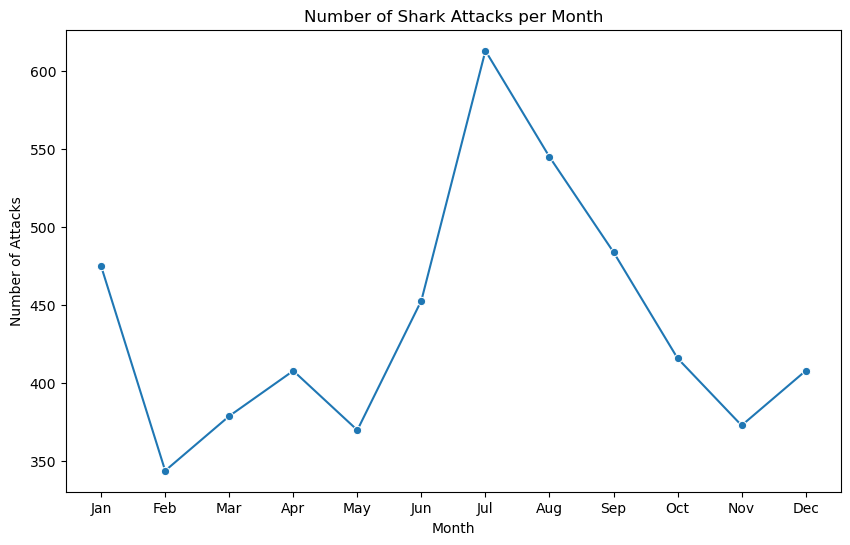

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='number of attacks', data=monthly_attacks, marker='o')

# Customize the plot
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set custom labels for the months
plt.title('Number of Shark Attacks per Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')

# Show the plot
plt.show()

In [28]:
shark_attack.groupby(['Region']).agg({'Type':'count'}).rename(columns={'Type':'number of attacks'})

,number of attacks
Region,
Caribbean,200
Central America,54
Eastern Africa,138
Eastern Asia,75
Eastern Europe,4
Melanesia,277
Micronesia,26
Middle Africa,1
North America,2618


In [29]:
pivot_shark = shark_attack.pivot_table(index='Region', columns='Month', values=['Type'], aggfunc='count', margins=True, margins_name='Total')
#pivot_shark = pivot_shark.sort_values(by='Region',ascending=True)

In [30]:
pivot_shark

Type                                                   \
Month                1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0   
Region                                                                      
Caribbean            9.0    8.0    9.0    7.0   14.0   22.0   25.0   22.0   
Central America      2.0    1.0    1.0    3.0    7.0    2.0    4.0    3.0   
Eastern Africa      22.0    5.0    7.0   11.0    7.0    5.0   12.0    8.0   
Eastern Asia         3.0    1.0    3.0    4.0    4.0   12.0   11.0   18.0   
Eastern Europe       NaN    NaN    NaN    NaN    NaN    NaN    1.0    3.0   
Melanesia           15.0   20.0   17.0   13.0   19.0   14.0    4.0    6.0   
Micronesia           1.0    1.0    NaN    3.0    1.0    NaN    1.0    1.0   
North America       63.0   64.0  113.0  176.0  174.0  261.0  389.0  333.0   
Northern Africa      1.0    1.0    2.0    1.0    NaN    6.0    4.0    8.0   
Northern Europe      NaN    1.0    NaN    NaN    1.0    3.0    4.0    4.0   
Oceania            221.0  160.0  133.0  107.0   59.0   61.0   47.0   55.0   
Polynesia            1.0    6.0    4.0    8.0    5.0    1.0    3.0    8.0   
South America       19.0   11.0   20.0   11.0    9.0   12.0   20.0    5.0   
Southeastern Asia    8.0    3.0    4.0    7.0   11.0    7.0    9.0    8.0   
Southern Africa    101.0   52.0   49.0   45.0   39.0   27.0   34.0   23.0   
Southern Asia        NaN    6.0    1.0    2.0    9.0    4.0    NaN    NaN   
Southern Europe      NaN    2.0    6.0    2.0    2.0    8.0   28.0   27.0   
Various              4.0    NaN    2.0    1.0    NaN    2.0    5.0    NaN   
Western Africa       NaN    1.0    1.0    3.0    NaN    NaN    1.0    1.0   
Western Asia         3.0    1.0    3.0    1.0    4.0    2.0    8.0    7.0   
Western Europe       NaN    NaN    NaN    NaN    1.0    1.0    NaN    1.0   
Total              473.0  344.0  375.0  405.0  366.0  450.0  610.0  541.0   

                                                     
Month                9.0   10.0   11.0   12.0 Total  
Region                                               
Caribbean           13.0   13.0    9.0    9.0   160  
Central America      4.0    2.0    6.0    NaN    35  
Eastern Africa       9.0    8.0    6.0   11.0   111  
Eastern Asia         8.0    2.0    2.0    NaN    68  
Eastern Europe       NaN    NaN    NaN    NaN     4  
Melanesia           16.0   10.0   11.0   11.0   156  
Micronesia           5.0    NaN    3.0    2.0    18  
North America      291.0  222.0  124.0   81.0  2291  
Northern Africa      2.0    2.0    5.0    4.0    36  
Northern Europe      7.0    3.0    NaN    NaN    23  
Oceania             59.0  100.0  142.0  194.0  1338  
Polynesia            2.0    2.0    1.0    3.0    44  
South America        8.0    9.0    7.0   11.0   142  
Southeastern Asia    6.0    6.0   10.0    4.0    83  
Southern Africa     21.0   27.0   33.0   64.0   515  
Southern Asia        NaN    NaN    NaN    3.0    25  
Southern Europe     15.0    5.0    1.0    5.0   101  
Various             11.0    1.0    7.0    3.0    36  
Western Africa       1.0    2.0    2.0    NaN    12  
Western Asia         5.0    NaN    1.0    2.0    37  
Western Europe       NaN    NaN    NaN    NaN     3  
Total              483.0  414.0  370.0  407.0  5238

In [31]:
#Modifying the pivot table to be able to plot it

pivot_shark.reset_index(inplace=True)
pivot_shark.columns = [' '.join(map(str, col)).strip() for col in pivot_shark.columns.values]
filtered_data = pivot_shark[pivot_shark['Region'] != 'Total']

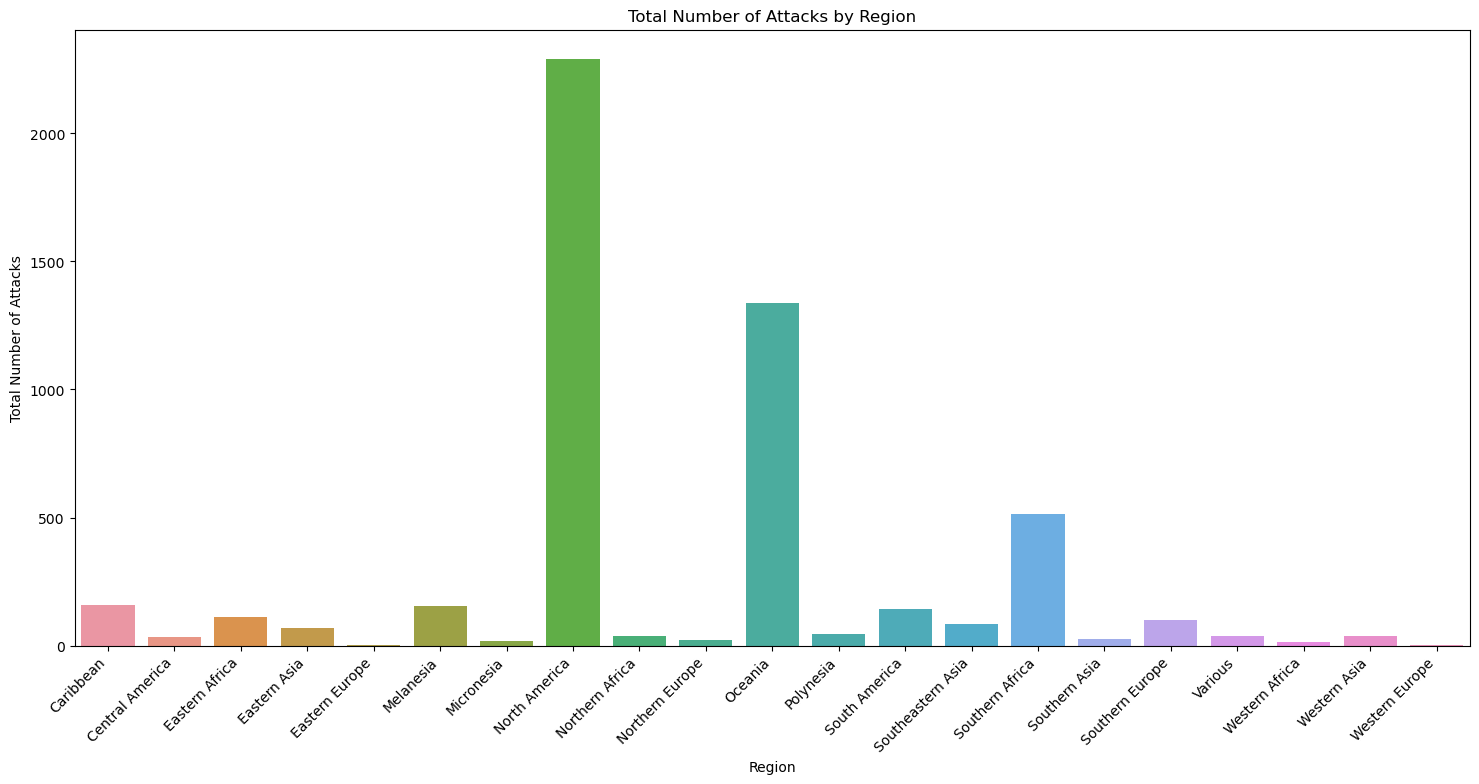

In [32]:
plt.figure(figsize=(18, 8))

bar_plot = sns.barplot(x='Region', y='Type Total', data=pivot_shark[pivot_shark['Region'] != 'Total'])

plt.xticks(rotation=45,ha='right')
plt.title('Total Number of Attacks by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Attacks')
plt.show()

In [40]:
print(pivot_shark.columns)

Index(['Region', 'Type 1.0', 'Type 2.0', 'Type 3.0', 'Type 4.0', 'Type 5.0',
       'Type 6.0', 'Type 7.0', 'Type 8.0', 'Type 9.0', 'Type 10.0',
       'Type 11.0', 'Type 12.0', 'Type Total'],
      dtype='object')


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


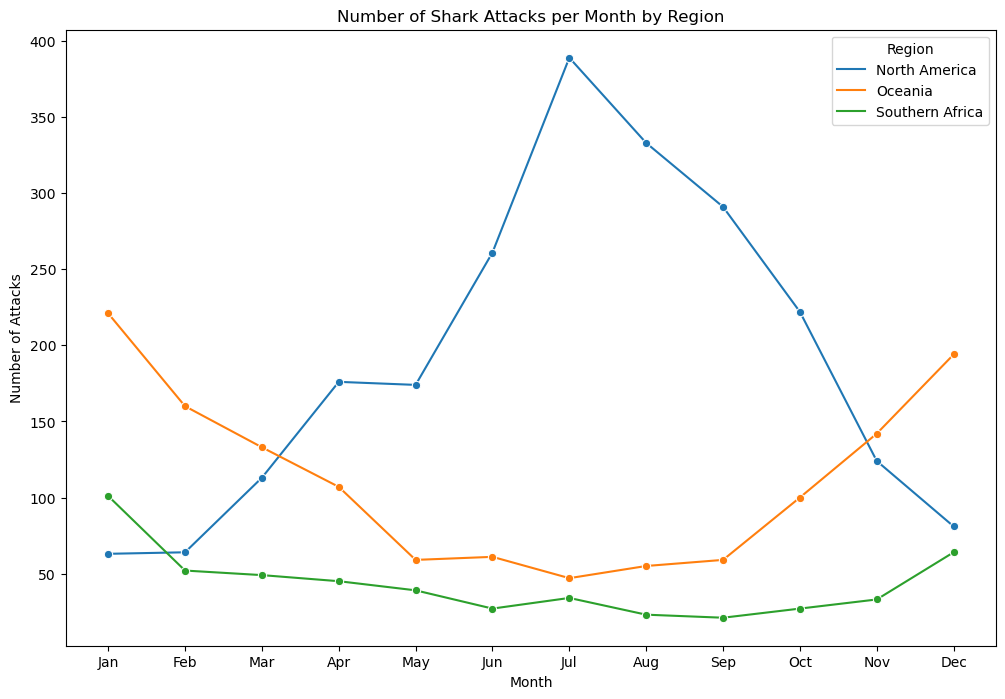

In [41]:
regions_of_interest = ['North America', 'Oceania', 'Southern Africa']
filtered_regions = pivot_shark[pivot_shark['Region'].isin(regions_of_interest)]

# Melting the DataFrame
melted_data = filtered_regions.melt(id_vars='Region', 
                                    value_vars=[f'Type {month}.0' for month in range(1, 13)],
                                    var_name='Month', value_name='Number of Attacks')

# Convert 'Month' from 'Type 1.0', 'Type 2.0', etc., to just '1', '2', ..., '12'
melted_data['Month'] = melted_data['Month'].apply(lambda x: x.split()[1].split('.')[0]).astype(int)

plt.figure(figsize=(12, 8))
line_plot = sns.lineplot(data=melted_data, x='Month', y='Number of Attacks', hue='Region', marker='o')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Customize x-axis labels
plt.title('Number of Shark Attacks per Month by Region')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.legend(title='Region')
plt.show()

In [ ]:
# Summer time in North America: June to August 
# Summer time in Oceania: December to February
# Summer time in Southern Africa: November to March

In [33]:
filter_oceania = shark_attack[shark_attack['Region'] == 'Oceania']
filter_oceania

,Date,Type,Country,State,Location,Sex,Age,Region,Month
0,2024-03-15,Unprovoked,AUSTRALIA,QUEENSLAND,Bargara Beach,F,28,Oceania,3.0
3,2024-02-25,Unprovoked,AUSTRALIA,WESTERN AUSTRALIA,"Sandlnd Island, Jurian Bay",F,28,Oceania,2.0
6,2024-01-29,Unprovoked,AUSTRALIA,NEW SOUTH WALES,"Elizabeth Bay, Sydney Harbor",F,28,Oceania,1.0
8,2024-01-09,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,"Walkers Beach, Elliston",M,28,Oceania,1.0
12,2023-12-28,Unprovoked,AUSTRALIA,SOUTH AUSTRALIA,Ethel Beach,M,28,Oceania,12.0
...,...,...,...,...,...,...,...,...,...
6903,NaT,Unprovoked,AUSTRALIA,TORRES STRAIT,Thursday Island?,M,28,Oceania,NaN
6919,NaT,Unprovoked,AUSTRALIA,NEW SOUTH WALES,"Spectacle Island, Port Jackson",M,28,Oceania,NaN
6924,NaT,Unprovoked,AUSTRALIA,QUEENSLAND,Great Barrier Reef,M,28,Oceania,NaN
6938,NaT,Unprovoked,AUSTRALIA,NEW SOUTH WALES,,M,28,Oceania,NaN


In [34]:
filter_na = shark_attack[shark_attack['Region'] == 'North America']
filter_na

,Date,Type,Country,State,Location,Sex,Age,Region,Month
1,2024-03-04,Unprovoked,USA,HAWAII,"Old Man's, Waikiki",M,28,North America,3.0
2,2024-03-02,Unprovoked,USA,HAWAII,"Rainbows, Oahu",F,28,North America,3.0
10,2023-12-30,Unprovoked,USA,HAWAII,"Baby Beach, Maui",M,28,North America,12.0
11,2023-12-29,Unprovoked,MEXICO,SONORA,"Tojahui Beach, Yavaros, Huatabampo",M,28,North America,12.0
16,2023-12-14,Unconfirmed,MEXICO,GUERRERO,"Playa Quieta, Ixtapa, Zihuatanejo",M,28,North America,12.0
...,...,...,...,...,...,...,...,...,...
6891,NaT,Unprovoked,USA,FLORIDA,"Palm Beach, Palm Beach County",M,28,North America,NaN
6925,NaT,Unprovoked,USA,FLORIDA,"Gadsden Point, Tampa Bay",M,28,North America,NaN
6930,NaT,Unprovoked,USA,NORTH CAROLINA,Somewhere between Hatteras and Beaufort,M,28,North America,NaN
6934,NaT,Unprovoked,USA,HAWAII,Puna,F,28,North America,NaN


In [35]:
filter_usa = shark_attack[shark_attack['Country'] == 'USA']
filter_usa

,Date,Type,Country,State,Location,Sex,Age,Region,Month
1,2024-03-04,Unprovoked,USA,HAWAII,"Old Man's, Waikiki",M,28,North America,3.0
2,2024-03-02,Unprovoked,USA,HAWAII,"Rainbows, Oahu",F,28,North America,3.0
10,2023-12-30,Unprovoked,USA,HAWAII,"Baby Beach, Maui",M,28,North America,12.0
24,2023-11-05,Unprovoked,USA,FLORIDA,"Juno Beach, Palm Beach County",M,28,North America,11.0
29,2023-10-25,Unprovoked,USA,HAWAII,"Pua’ena Point, Haleiwa, Oahu",M,28,North America,10.0
...,...,...,...,...,...,...,...,...,...
6891,NaT,Unprovoked,USA,FLORIDA,"Palm Beach, Palm Beach County",M,28,North America,NaN
6925,NaT,Unprovoked,USA,FLORIDA,"Gadsden Point, Tampa Bay",M,28,North America,NaN
6930,NaT,Unprovoked,USA,NORTH CAROLINA,Somewhere between Hatteras and Beaufort,M,28,North America,NaN
6934,NaT,Unprovoked,USA,HAWAII,Puna,F,28,North America,NaN


In [36]:
pivot_usa = filter_usa.pivot_table(index='State', columns='Month', values=['Type'], aggfunc='count', margins=True, margins_name='Total')
pivot_usa 

Type                                           \
Month                      1.0   2.0    3.0    4.0    5.0    6.0    7.0   
State                                                                     
 NORTH CAROLINA            NaN   NaN    NaN    NaN    NaN    NaN    NaN   
ALABAMA                    NaN   NaN    NaN    1.0    NaN    4.0    4.0   
BAHAMAS                    NaN   NaN    NaN    NaN    NaN    NaN    2.0   
CALIFORNIA                10.0   6.0    8.0    8.0   20.0   26.0   53.0   
CAROLINA COAST             NaN   NaN    NaN    NaN    NaN    NaN    NaN   
CAYMAN ISLANDS             NaN   NaN    NaN    NaN    NaN    NaN    NaN   
CONNECTICUT                NaN   NaN    NaN    NaN    NaN    NaN    1.0   
CUBA                       NaN   NaN    NaN    NaN    NaN    NaN    NaN   
DELAWARE                   NaN   NaN    NaN    NaN    NaN    1.0    1.0   
FLORIDA                   22.0  27.0   70.0  115.0   93.0  114.0  139.0   
FLORIDA                    NaN   NaN    NaN    NaN    NaN    NaN    1.0   
FRANKLIN COUNTY, FLORIDA   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
GEORGIA                    NaN   NaN    NaN    NaN    2.0    5.0    4.0   
GUAM                       NaN   NaN    NaN    NaN    1.0    NaN    NaN   
HAWAII                    17.0  18.0   25.0   30.0   22.0   23.0   17.0   
JOHNSTON ATOLL             NaN   NaN    NaN    NaN    NaN    1.0    NaN   
KENTUCKY                   NaN   NaN    NaN    NaN    NaN    NaN    1.0   
LOUISIANA                  1.0   NaN    NaN    NaN    NaN    1.0    2.0   
MAINE                      NaN   NaN    NaN    NaN    NaN    NaN    1.0   
MARYLAND                   NaN   NaN    NaN    1.0    NaN    NaN    2.0   
MASSACHUSETTS              NaN   1.0    NaN    NaN    NaN    NaN    7.0   
MAUI                       NaN   2.0    NaN    NaN    NaN    NaN    NaN   
MIDWAY ATOLL               NaN   NaN    NaN    NaN    NaN    1.0    NaN   
MISSISSIPPI                NaN   NaN    NaN    NaN    NaN    NaN    4.0   
NEW JERSEY                 NaN   NaN    NaN    1.0    2.0    7.0   16.0   
NEW MEXICO                 NaN   NaN    1.0    NaN    NaN    NaN    NaN   
NEW YORK                   1.0   NaN    NaN    NaN    NaN    4.0   21.0   
NEW YORK                   NaN   NaN    NaN    NaN    NaN    NaN    NaN   
NOIRTH CAROLINA            NaN   NaN    NaN    NaN    NaN    NaN    1.0   
NORTH CAROLINA             1.0   1.0    NaN    1.0    3.0   19.0   32.0   
NORTH CAROLINA             NaN   NaN    NaN    NaN    1.0    NaN    NaN   
OREGON                     2.0   1.0    2.0    1.0    NaN    NaN    2.0   
PALMYRA ATOLL              NaN   NaN    NaN    NaN    NaN    1.0    NaN   
PENNSYLVANIA               NaN   1.0    NaN    NaN    NaN    NaN    NaN   
PUERTO RICO                NaN   1.0    1.0    1.0    NaN    NaN    3.0   
RHODE ISLAND               NaN   NaN    NaN    NaN    NaN    1.0    1.0   
SAMOA                      NaN   NaN    NaN    NaN    NaN    NaN    NaN   
SOUTH CAROLINA             1.0   1.0    NaN    2.0   13.0   35.0   38.0   
SOUTH CAROLINA             NaN   NaN    NaN    NaN    NaN    NaN    NaN   
TEXAS                      1.0   1.0    NaN    5.0    7.0    9.0   23.0   
US VIRGIN ISLANDS          NaN   1.0    NaN    1.0    NaN    NaN    1.0   
VIRGIN ISLANDS             NaN   NaN    NaN    NaN    NaN    NaN    NaN   
VIRGINIA                   NaN   NaN    NaN    NaN    2.0    1.0    1.0   
WAKE ISLAND                NaN   NaN    NaN    NaN    NaN    NaN    NaN   
WASHINGTON                 NaN   NaN    NaN    1.0    NaN    NaN    1.0   
Total                     56.0  61.0  107.0  168.0  166.0  253.0  379.0   

                                                                  
Month                       8.0    9.0   10.0   11.0  12.0 Total  
State                                                             
 NORTH CAROLINA             1.0    NaN    NaN    NaN   NaN     1  
ALABAMA                     2.0    1.0    1.0    NaN   NaN    13  
BAHAMAS        

In [37]:
pivot_oceania = filter_oceania.pivot_table(index='Country', columns='Month', values=['Type'], aggfunc='count', margins=True, margins_name='Total')
pivot_oceania 

Type                                                            \
Month          1.0    2.0    3.0    4.0   5.0   6.0   7.0   8.0   9.0   10.0   
Country                                                                        
AUSTRALIA    193.0  140.0  120.0  100.0  56.0  58.0  47.0  52.0  57.0   96.0   
NEW BRITAIN    NaN    NaN    NaN    NaN   1.0   1.0   NaN   2.0   NaN    1.0   
NEW ZEALAND   28.0   20.0   13.0    7.0   2.0   2.0   NaN   1.0   2.0    3.0   
Total        221.0  160.0  133.0  107.0  59.0  61.0  47.0  55.0  59.0  100.0   

                                 
Month         11.0   12.0 Total  
Country                          
AUSTRALIA    137.0  173.0  1229  
NEW BRITAIN    NaN    1.0     6  
NEW ZEALAND    5.0   20.0   103  
Total        142.0  194.0  1338

In [38]:
pivot_na = filter_na.pivot_table(index='Country', columns='Month', values=['Type'], aggfunc='count', margins=True, margins_name='Total')
pivot_na

Type                                                                \
Month     1.0   2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0   10.0   
Country                                                                       
BERMUDA   NaN   NaN    NaN    1.0    1.0    1.0    1.0    2.0    2.0    2.0   
CANADA    1.0   NaN    NaN    NaN    NaN    1.0    3.0    3.0    NaN    NaN   
MEXICO    6.0   3.0    6.0    7.0    7.0    6.0    6.0    4.0    5.0    4.0   
USA      56.0  61.0  107.0  168.0  166.0  253.0  379.0  324.0  284.0  216.0   
Total    63.0  64.0  113.0  176.0  174.0  261.0  389.0  333.0  291.0  222.0   

                            
Month     11.0  12.0 Total  
Country                     
BERMUDA    NaN   NaN    10  
CANADA     NaN   1.0     9  
MEXICO     6.0   7.0    67  
USA      118.0  73.0  2205  
Total    124.0  81.0  2291